# TFY4345 Classical Mechanics - Assignment 2
## By: Jamal Sharifi

##  Code for the assignment 

In [416]:
import math
from matplotlib import pyplot as plt
import numpy as np
from numpy.linalg import norm 

def a_11(psi): 
    return 2*15*5.7*5*math.cos(psi)-(2000*1.2**2+15*5.7**2)-15*5**2
def a_12(psi):
    return 15*5**2-15*5*5.7*math.cos(psi)
def a_22(psi):
    return -15*5**2

def b_1(theta,psi,theta_dot,psi_dot):
    return (9.81*(2000*1.2)*math.sin(theta)-
            9.81*15*(5.7*math.sin(theta)+5*math.sin(psi-theta))-
            15*5.7*5*psi_dot*math.sin(psi)*(psi_dot-2*theta_dot))
def b_2(theta,psi,theta_dot,psi_dot):
    return 15*5*(9.81*math.sin(psi-theta)-5.7*theta_dot**2*math.sin(psi))

#f(thetadt^2,psidt^2)=A^-1*b.
def f(p):
    theta,psi,theta_dot,psi_dot=p[0],p[1],p[2],p[3]
    A = np.array([[a_11(psi), a_12(psi)],
              [a_12(psi),a_22(psi)]])
    b=[b_1(theta,psi,theta_dot,psi_dot), b_2(theta,psi,theta_dot,psi_dot)]
    return np.matmul(np.linalg.inv(A), b)

#Getting k1,k2,k3 and k4 parameters for rk4 method.
def rk4_2(p,dt):
    return list(np.array([p[2],p[3],f(p)[0],f(p)[1]])*dt)

#Calculating the position of the projectile.
def r_x(theta, psi_theta):
    return -5.7*np.sin(theta)-5*np.sin(psi_theta)
def r_y(theta, psi_theta):
    return 5.7*np.cos(theta)+3.2-5*np.cos(psi_theta)

#Calculating the velocity of the projectile.
def v_x(theta,psi,theta_dot,psi_dot):
    return -5.7*theta_dot*np.cos(theta)-5*(psi_dot-theta_dot)*np.cos(psi-theta)
def v_y(theta,psi,theta_dot,psi_dot):
    return -5.7*theta_dot*np.sin(theta)+5*(psi_dot-theta_dot)*np.sin(psi-theta)

#Runge-kutta algorithm.
def rk4_method(task):
    #Initial function parameters for a given task.
    #theta,psi,theta_dot,psi_dot,t.
    if task == "4" or task == "3A" or task == "2":
        p=[0.7*np.pi,0.2*np.pi,0,0]
    if task == "3B":
        p=[0.9*np.pi,0.4*np.pi,0,0]
    if task == "3C":
        p=[0.7*np.pi,0*np.pi,0,0]
        
    p_vec=[[p[0]],[p[1]],[p[2]],[p[3]],[0]]
    C=np.array([[1,0.5,0.5,1],[1/6,1/3,1/3,1/6]])
    dt=0.0001        

    for i in range(int(5/dt)):
        #4x4 matrix that temperarly stores the k_n parameters for Rk4.
        rk4=[[0,0,0,0]]*4
        for j in range(4):
            rk4[j]=rk4_2(np.array(rk4[j-1])*C[0][j]+np.array(p),C[1][j]*dt)
        final_rk4=[0]*4
        for k in range(4):
            final_rk4[k]= sum(np.array(rk4)[:,k])
        
        p=list(np.array(p)+np.array(final_rk4))
        for z in range(4):
            p_vec[z].append(p[z])
        p_vec[4].append(p_vec[4][i]+dt)
    return p_vec

def task_2(task):
    plt.figure(figsize=(7,4))
    plt.xlim(0,5)
    plt.ylim(-9,10)
    plt.xticks(fontsize = 15)
    plt.yticks(fontsize = 15)
    plt.title(r"$\theta_0$" +"= 0.7"+r"$\pi$"+", "+r"$\psi_0$" +"= 0.2"+r"$\pi$", fontsize=15)
    plt.xlabel("t [s]", fontsize=15)
    p_vec=rk4_method(task)
    for i in range(4):
        plt.plot(p_vec[4],p_vec[i],linewidth=2.5)
    plt.legend([r"$\theta$", r"$\psi$",r"$\dot{\theta}$", r"$\dot{\psi}$"])
    
    plt.figure(figsize=(7,4))
    plt.xlim(-8,8)
    plt.ylim(-1,14.4)
    plt.xticks(fontsize = 15)
    plt.yticks(fontsize = 15)
    plt.title(r"$\theta_0$" +"= 0.7"+r"$\pi$"+", "+r"$\psi_0$" +"= 0.2"+r"$\pi$", fontsize=15)
    plt.xlabel("x [m]", fontsize=15)
    plt.ylabel("y [m]", fontsize=15)
    plt.plot(r_x(p_vec[0], np.array(p_vec[1])-np.array(p_vec[0])),r_y(p_vec[0], np.array(p_vec[1])-np.array(p_vec[0])),linewidth=2.5)

def task_3A(p_vec,dt,i):
    plt.figure(figsize=(8,5))
    
    rx=r_x(p_vec[0][:i], np.array(p_vec[1][:i])-np.array(p_vec[0][:i]))
    ry=r_y(p_vec[0][:i], np.array(p_vec[1][:i])-np.array(p_vec[0][:i]))
    r=[[rx[-1]], [ry[-1]]]
    plt.plot(rx,ry,linewidth=2.5)
    
    vx=v_x(p_vec[0][i],p_vec[1][i],p_vec[2][i],p_vec[3][i])
    vy=v_y(p_vec[0][i],p_vec[1][i],p_vec[2][i],p_vec[3][i])
    v=[vx, vy]
    
    for i in range(150000):
        r[0].append(r[0][i]+v[0]*dt)
        r[1].append(r[1][i]+v[1]*dt)
        v[1]=v[1]-9.81*dt
        if r[1][i] <0:
            break
    plt.plot(r[0],r[1],linewidth=2.5)
    plt.xlabel("x [m]", fontsize=15)
    plt.ylabel("y [m]", fontsize=15)
    plt.xlim(-9,280)
    plt.ylim(-0.6,135)
    plt.xticks(fontsize = 15)
    plt.yticks(fontsize = 15)
    plt.title(r"$\theta_0$" +"= 0.7"+r"$\pi$"+", "+r"$\psi_0$" +"= 0.2"+r"$\pi$", fontsize=15)
    
def task_3(task):
    p_vec,dt=rk4_method(task),0.001
    for i in range(len(p_vec[0])):
        if p_vec[0][i]<=0.1*math.pi:
            break
            
    if task=="3A":
        task_3A(p_vec,dt,i)
    
    plt.figure(figsize=(8,5))
    p_vec=np.array(p_vec)
    
    vx=v_x(p_vec[0],p_vec[1],p_vec[2],p_vec[3])
    vy=v_y(p_vec[0],p_vec[1],p_vec[2],p_vec[3])
    angle_velocities=[]
    if task=="3A":
        n_angles=[31.6,20,11,5]
    if task=="3B":
        n_angles=[40,30,20,10]
    if task=="3C":
        n_angles=[11.7,8,4,0]
    
    for i in range(len(p_vec[0])):
        angle=round(p_vec[0][i]*180/np.pi,1)
        if vx[i]>=0:
            if angle in n_angles:
                angle_velocities.append([round(angle,1),vx[i],vy[i],i])
                n_angles.pop(n_angles.index(round(angle,1)))
            
    for i in range(len(angle_velocities)):
        v=[angle_velocities[i][1], angle_velocities[i][2]]
        r=[[0], [0]]
        for i in range(150000):
            r[0].append(r[0][i]+v[0]*dt)
            r[1].append(r[1][i]+v[1]*dt)
            v[1]=v[1]-9.81*dt
            if r[1][i]<0:
                break
            
        plt.plot(r[0],r[1],linewidth=3)
    plt.xlabel("x [m]", size = 30)
    plt.ylabel('y [m]', size = 30)
    if task=="3A":
        plt.xlim(-1,365)
        plt.title(r"$\theta_0$" +"= 0.7"+r"$\pi$"+", "+r"$\psi_0$" +"= 0.2"+r"$\pi$", fontsize=15)
    if task=="3B":
        plt.xlim(-1,340) 
        plt.title(r"$\theta_0$" +"= 0.9"+r"$\pi$"+", "+r"$\psi_0$" +"= 0.4"+r"$\pi$", fontsize=15)
    if task=="3C":
        plt.xlim(-1,250)
        plt.title(r"$\theta_0$" +"= 0.7"+r"$\pi$"+", "+r"$\psi_0$" +"= 0"+r"$\pi$", fontsize=15)

    plt.ylim(-0.6,130)
    plt.xlabel("x [m]", fontsize=15)
    plt.ylabel("y [m]", fontsize=15)
    plt.xticks(fontsize = 20)
    plt.yticks(fontsize = 20)
    name=[]
    for i in range(4):
        name.append(str(angle_velocities[i][0]))
    plt.legend([r"$\theta_r$ = "+name[0], r"$\theta_r$ = "+name[1],r"$\theta_r$ = "+name[2], r"$\theta_r$ = "+name[3]],fontsize=12)

def task_4():
    p_vec,dt=rk4_method("4"),0.001
    for f in range(len(p_vec[0])):
        if p_vec[0][f]<0*math.pi:
            break
 
    range_angle=[[0], [0]]
    velocity=[[0], [0]]
    for i in range(f):
        r=[0, 0]
        vx=v_x(p_vec[0][i],p_vec[1][i],p_vec[2][i],p_vec[3][i])
        vy=v_y(p_vec[0][i],p_vec[1][i],p_vec[2][i],p_vec[3][i])
        v=[vx, vy]
        angle=p_vec[0][i]*180/np.pi
        for j in range(1000000):
            r[0]=r[0]+v[0]*dt
            r[1]=r[1]+v[1]*dt
            v[0]=v[0]
            v[1]=v[1]-9.81*dt
            
            if r[1] <0 or angle>=40:
                break
        if r[1] >=0 or angle<=40:
            range_angle[0].append(angle)
            range_angle[1].append(r[0])
            velocity[0].append(v[0])
            velocity[1].append(v[1])
    
    v=np.array(velocity[0])*np.array(velocity[0])+np.array(velocity[1])*np.array(velocity[1])
    v=list(v*7.5/1000)

    fig_stat=[[[0,31],[20,370],"Range [m]",range_angle[1],"blue"],[[0,31],[17.7,30],"E [kJ]",v,"red"]]
    for i in range(2):
        plt.figure(figsize=(8,5))
        plt.xlim(fig_stat[i][0])
        plt.ylim(fig_stat[i][1])
        plt.xlabel(r"$\theta_r$ "+ "[deg]", fontsize=15)
        plt.ylabel(fig_stat[i][2], fontsize=15)
        plt.xticks(fontsize = 15)
        plt.yticks(fontsize = 15)
        plt.plot(range_angle[0],fig_stat[i][3],linewidth=2.5,color=fig_stat[i][4])
        plt.title(r"$\theta_0$" +"= 0.7"+r"$\pi$"+", "+r"$\psi_0$" +"= 0.2"+r"$\pi$", fontsize=15)
        
def task(task):
    if task=="2":
        task_2("2")
    if task=="3A":
        task_3("3A")
    if task=="3B":
        task_3("3B")
    if task=="3C":
        task_3("3C")
    if task=="4":
        task_4()


## Task 1:

The coordinates of the trebuchet hinges are:
\begin{equation}
          \vec{r_{1}} =\begin{pmatrix} l_1  sin(\theta)\\  l_3-l_1  cos(\theta)\\ \end{pmatrix}\\
          \vec{r_{2_{a}}} =\begin{pmatrix} -l_2 sin(\theta)\\  l_2 cos(\theta)+l_3\\ \end{pmatrix}\\
          \vec{r_{2_{b}}} =\vec{r_{2_{a}}}-\begin{pmatrix} l_4 sin(\psi-\theta)\\  l_4 cos(\psi-\theta)\\ \end{pmatrix} =\begin{pmatrix} -l_2 sin(\theta)-l_4 sin(\psi-\theta)\\  l_2 cos(\theta)+l_3 - l_4 cos(\psi-\theta)\\ \end{pmatrix}
\end{equation}

The coordinate derivation for the two masses with respect to time are:

\begin{equation}
\begin{split}
          \dot{\vec{r_{1}}} &=\begin{pmatrix} l_1\dot{\theta}\cos(\theta)\\  l_1 \dot{\theta}\sin(\theta)\\ \end{pmatrix}\\
          \dot{\vec{r_{2_{b}}}} &=\begin{pmatrix} -l_2\dot{\theta}\cos(\theta)-l_4(\dot{\psi}-\dot{\theta})cos(\psi-\theta)\\  -l_2\dot{\theta}\sin(\theta)+l_4(\dot{\psi}-\dot{\theta})sin(\psi-\theta) \\ \end{pmatrix}
\end{split}
\end{equation}

And the velocities squared:
\begin{equation} \label{eq1}
\begin{split}
{v_1}^2=\dot{\vec{r_{1}}}\cdot\dot{\vec{r_{1}}} &= l_1^2\dot{\theta}^2\\
{v_2}^2=\dot{\vec{r_{2_{b}}}}\cdot\dot{\vec{r_{2_{b}}}} & = l_2^2\dot{\theta}^2\cos^2(\theta)+l_4^2(\dot{\psi}-\dot{\theta})^2cos^2(\psi-\theta)+2l_2l_4\dot{\theta}(\dot{\psi}-\dot{\theta})cos(\theta)cos(\psi-\theta) \\
 & + l_2^2\dot{\theta}^2\sin^2(\theta)+l_4^2(\dot{\psi}-\dot{\theta})^2sin^2(\psi-\theta)-2l_2l_4\dot{\theta}(\dot{\psi}-\dot{\theta})sin(\theta)sin(\psi-\theta)\\
 & = l_2^2\dot{\theta}^2+l_4^2(\dot{\psi}-\dot{\theta})^2+2l_2l_4\dot{\theta}(\dot{\psi}-\dot{\theta})\big(cos(\theta)cos(\psi-\theta)-sin(\theta)sin(\psi-\theta)\big)\\
 & = l_2^2\dot{\theta}^2+l_4^2(\dot{\psi}-\dot{\theta})^2+2l_2l_4\dot{\theta}(\dot{\psi}-\dot{\theta})cos(\psi)
\end{split}
\end{equation}

The potential energy of the system:

\begin{equation} 
V =m_1gh_1+m_2gh_2=m_1g\big(l_3-l_1  cos(\theta)\big)+m_2g\big(l_2 cos(\theta)+l_3 - l_4 cos(\psi-\theta)\big)
\end{equation}

The kinetic energy of the system:
\begin{equation} 
T =\frac{1}{2}{m_1}{v_1}^2 +\frac{1}{2}{m_2}{v_2}^2 =\frac{1}{2}{m_1}\big(l_1^2\dot{\theta}^2\big) +\frac{1}{2}{m_2}\big(l_2^2\dot{\theta}^2+l_4^2(\dot{\psi}-\dot{\theta})^2+2l_2l_4\dot{\theta}(\dot{\psi}-\dot{\theta})cos(\psi) \big)
\end{equation}

This gives the Lagrangian:
\begin{equation} 
\begin{split}
L = T-V & = \frac{1}{2}{m_1}\big(l_1^2\dot{\theta}^2\big) +\frac{1}{2}{m_2}\big(l_2^2\dot{\theta}^2+l_4^2(\dot{\psi}-\dot{\theta})^2+2l_2l_4\dot{\theta}(\dot{\psi}-\dot{\theta})cos(\psi) \big) - \big(m_1g\big(l_3-l_1  cos(\theta)\big)+m_2g\big(l_2 cos(\theta)+l_3 - l_4 cos(\psi-\theta)\big)\big)\\
& =\frac{1}{2}\big(m_1l_1^2+m_2l_2^2\big)\dot{\theta}^2+\frac{1}{2}m_2l_4^2(\dot{\psi}-\dot{\theta})^2+m_2l_2l_4\dot{\theta}(\dot{\psi}-\dot{\theta})cos(\psi)-gl_3(m_1+m_2)+g(m_1l_1-m_2l_2)cos(\theta)+m_2gl_4cos(\psi-\theta)
\end{split}
\end{equation}

Finding the EOM for the two generalized coordinates:
\begin{equation} 
\begin{split}
\frac{\partial L}{\partial \theta} &=gm_2l_4sin(\psi-\theta)-g(m_1l_1-m_2l_2)sin(\theta)\\
\frac{\partial L}{\partial \dot{\theta}} &=(m_1l_1^2+m_2l_2^2)\dot{\theta}-m_2l_4^2(\dot{\psi}-\dot{\theta})+m_2l_2l_4(\dot{\psi}-\dot{\theta})cos(\psi)-m_2l_2l_4\dot{\theta}cos(\psi)\\
\frac{d}{dt} \frac{\partial L}{\partial \dot{\theta}} &=(m_1l_1^2+m_2l_2^2)\ddot{\theta}-m_2l_4^2(\ddot{\psi}-\ddot{\theta})+m_2l_2l_4(\ddot{\psi}-\ddot{\theta})cos(\psi)-m_2l_2l_4\dot{\psi}(\dot{\psi}-\dot{\theta})sin(\psi)-m_2l_2l_4\ddot{\theta}cos(\psi)+m_2l_2l_4\dot{\theta}\dot{\psi}sin(\psi)\\
\frac{\partial L}{\partial \psi} &=-m_2l_2l_4\dot{\theta}(\dot{\psi}-\dot{\theta})sin(\psi)-gm_2l_4sin(\psi-\theta)\\
\frac{\partial L}{\partial \dot{\psi}} &=m_2l_4^2(\dot{\psi}-\dot{\theta})+m_2l_2l_4\dot{\theta}cos(\psi)\\
\frac{d}{dt} \frac{\partial L}{\partial \dot{\psi}} &=m_2l_4^2(\ddot{\psi}-\ddot{\theta})+m_2l_2l_4\ddot{\theta}cos(\psi)-m_2l_2l_4\dot{\theta}\dot{\psi}sin(\psi)
\end{split}
\end{equation}

Using the results above, we get the EOM:
\begin{equation} 
\begin{split}
\frac{\partial L}{\partial \theta} - \frac{d}{dt} \frac{\partial L}{\partial \dot{\theta}} &=gm_2l_4sin(\psi-\theta)-g(m_1l_1-m_2l_2)sin(\theta)-\big((m_1l_1^2+m_2l_2^2)\ddot{\theta}-m_2l_4^2(\ddot{\psi}-  \ddot{\theta})\\ &+m_2l_2l_4(\ddot{\psi}-\ddot{\theta})cos(\psi)-m_2l_2l_4\dot{\psi}(\dot{\psi}-\dot{\theta})sin(\psi)-m_2l_2l_4\ddot{\theta}cos(\psi)+m_2l_2l_4\dot{\theta}\dot{\psi}sin(\psi) \big)=0\\
\frac{\partial L}{\partial \psi} - \frac{d}{dt} \frac{\partial L}{\partial \dot{\psi}} &= -m_2l_2l_4\dot{\theta}(\dot{\psi}-\dot{\theta})sin(\psi)-gm_2l_4sin(\psi-\theta) - \big(m_2l_4^2(\ddot{\psi}-\ddot{\theta})+m_2l_2l_4\ddot{\theta}cos(\psi)-m_2l_2l_4\dot{\theta}\dot{\psi}sin(\psi) \big)=0 
\end{split}
\end{equation}

Rearenging the EOM we get:
\begin{equation} 
\begin{split}
& \big(2m_2l_2l_4cos(\psi)-(m_1l_1^2+m_2l_2^2)-m_2l_4^2\big)\ddot{\theta}+\big(m_2l_4^2-m_2l_2l_4cos(\psi)\big)\ddot{\psi}\\ &=g(m_1l_1-m_2l_2)sin(\theta)-gm_2l_4sin(\psi-\theta)-m_2l_2l_4\dot{\psi}(\dot{\psi}-\dot{\theta})sin(\psi)+m_2l_2l_4\dot{\theta}\dot{\psi}sin(\psi)\\
& \big(m_2l_4^2-m_2l_2l_4cos(\psi)\big)\ddot{\theta}-m_2l_4^2\ddot{\psi}=m_2l_2l_4\dot{\theta}(\dot{\psi}-\dot{\theta})sin(\psi)+gm_2l_4sin\psi-\theta) -m_2l_2l_4\dot{\theta}\dot{\psi}sin(\psi)\\
\end{split}
\end{equation}

In matrix form we get:
\begin{equation}
           \begin{pmatrix} 2m_2l_2l_4cos(\psi)-(m_1l_1^2+m_2l_2^2)-m_2l_4^2 & m_2l_4^2-m_2l_2l_4cos(\psi) \\ m_2l_4^2-m_2l_2l_4cos(\psi) &-m_2l_4^2\\ \end{pmatrix} \begin{pmatrix} \ddot{\theta}\\  \ddot{\psi}\\ \end{pmatrix}
           = \begin{pmatrix} g(m_1l_1)sin(\theta)-gm_2\big(l_2sin(\theta)+l_4sin(\psi-\theta)-m_2l_2l_4\dot{\psi}sin(\psi)(\dot{\psi}-2\dot{\theta})\\  m_2l_4\big(gsin(\psi-\theta) -l_2\dot{\theta}^2sin(\psi)\big)\\ \end{pmatrix}
\end{equation}

Or
\begin{equation}
           \begin{pmatrix} a_{11} & a_{12} \\ a_{12} & a_{22} \\ \end{pmatrix} \begin{pmatrix} \ddot{\theta}\\  \ddot{\psi}\\ \end{pmatrix}
           = \begin{pmatrix} b_1\\  b_2\\ \end{pmatrix}
\end{equation}

Where
\begin{equation} 
\begin{split}
a_{11}& = 2m_2l_2l_4cos(\psi)-(m_1l_1^2+m_2l_2^2)-m_2l_4^2\\
a_{12}& = m_2l_4^2-m_2l_2l_4cos(\psi)\\
a_{22}& =-m_2l_4^2\\
b_{1}& =g(m_1l_1)sin(\theta)-gm_2\big(l_2sin(\theta)+l_4sin(\psi-\theta)\big)-m_2l_2l_4\dot{\psi}sin(\psi)(\dot{\psi}-2\dot{\theta})\\
b_{2}& =m_2l_4\big(gsin(\psi-\theta) -l_2\dot{\theta}^2sin(\psi)\big)\\
\end{split}
\end{equation}

## Task 2:
The first figure below shows the system parameters with initial conditions for a period of 5 seconds. As expected, the functions are all periodic. The second figure shows the position coordinates for the projectile. Here we see that the motion of the projectile is approximately periodic. The motion is alternating back and forth like a pendulum due to counterweight moving up and down.  

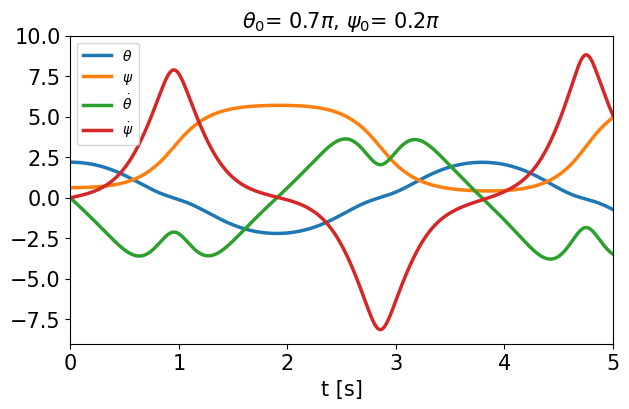

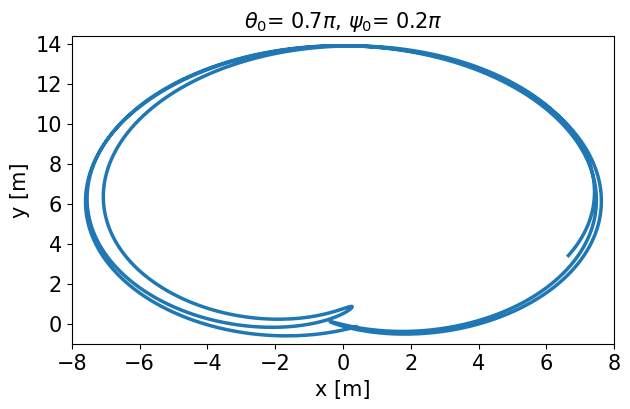

In [417]:
task("2")

## Task 3:
The first figure below shows the position(blue curve) of the projectile from $\theta_0$ to the release angle of $\theta_r=0.1 \pi$, then using the initial velocity the position is calculated to the moment of impact (orange curve). The second figure shows 4 trajectories with the same initial conditions but with diffrent release angles. The release angle with longest range is 11 degrees, and angles greater than 31.6 degrees will cause the projectile to have motion in the (-x) direction. When the system start with these intial condition the projectile has an kinetic energy at the moment of release that correspond to a velocity which is in the(-x) direction for any greater angle 31.6 degrees. 

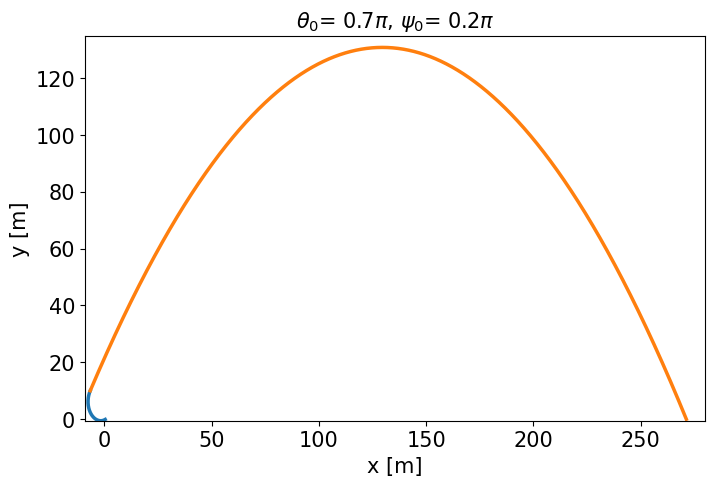

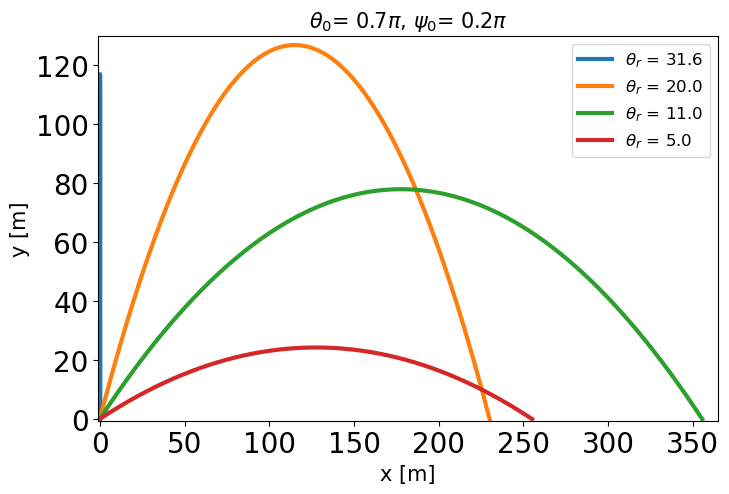

In [418]:
task("3A")

The figure below shows the positions of several projectiles for initial angles of $\theta_0 = 0.9 \pi $ and $\psi_0 = 0.4 \pi $. Here the counterweight is placed higher and therefore the potential energy is greater to begin with. When the potential energy is converted to kinetic energy the projectile will have much greater velocity will not fire in (-x) direction for smaller angles than 40 degrees. The greatest range is around 30 degrees.

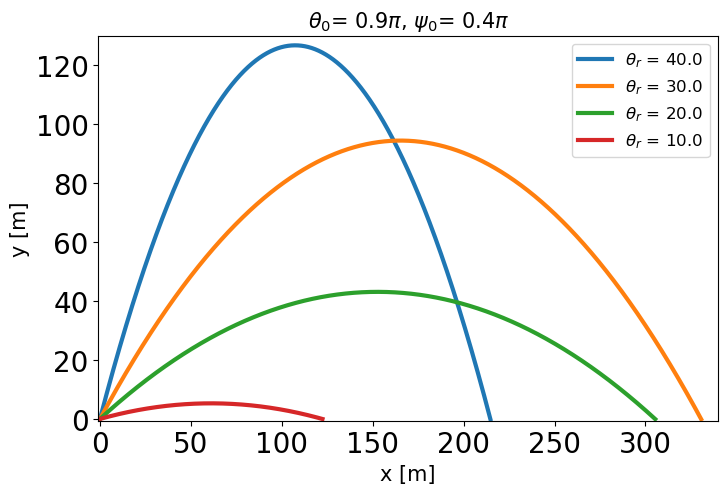

In [419]:
task("3B")

The figure below shows the positions of several projectiles for initial angles of  $\theta_0 = 0.7 \pi $ and $\psi_0 = 0 \pi $. Here the projectile is placed at a lower height and therefore fires in the (+x) direction only for smaller release angles. Greatest release angle is 11.7 degrees and the greatest range is when the release angle is 0 degrees. This is because the projectile is accelerated when it swinging and when it is at 0 degrees it has gained most of its momentum.

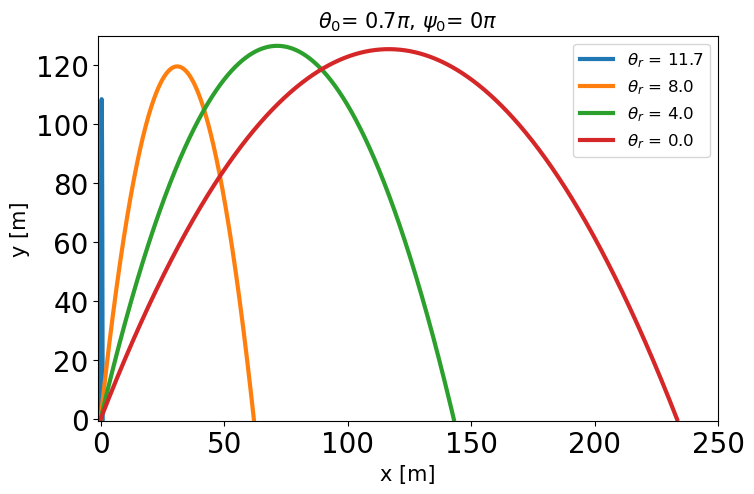

In [420]:
task("3C")

## Task 4:
The first figure below shows range as a function of release angle. As shown before the greatest range is achieved when the release angle is around 11 degrees.  The smaller the release angle ($\theta_0$) the greater energy will the projectile have. However, the angle of the projectile with respect to the velocity vector would be too small and the same is true for to great angles for the projectile to have a good range. So ideally one would like to have the projectile accelerated to a great velocity and then release at an angle ($\theta_r$) which gives an angle between the velocities($v_x,v_y$) around 45 degrees (excluding wind). In this case this is achieved around a release angle of 11 degrees. When it comes to the energy curve, we see that the smaller the angle the greater the velocity will be and therefore the greater the kinetic energy at the moment of impact. This is because more of the potential energy of the counterweight is converted to kinetic energy to the projectile.

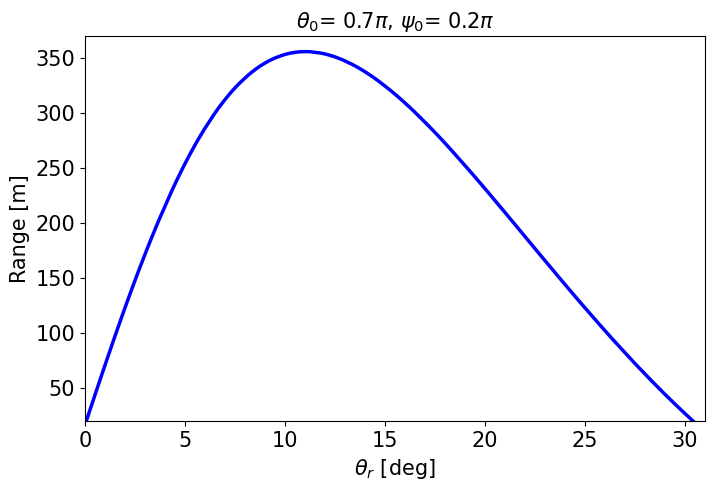

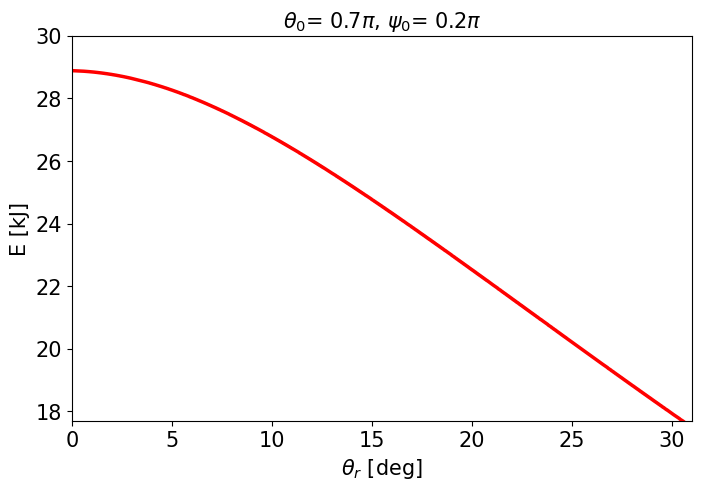

In [421]:
task("4")